In [2]:
import matplotlib.pyplot as plt, numpy as np
from math import nan

In [4]:
TRIANGLE = np.array([
            [1, 3, 4, 1, nan, 3, 3],
            [0, 2, 0, 0, nan, 2, 0]
            ])

SQUARE = np.array([
            [0, 3, 3, 0, 0, nan, 1, 2], 
            [0, 0, 2, 2, 0, nan, 1, 1]
            ])

CONCENTRIC = np.array([
            [0, 0, 3, 3, 0, nan, 1, 1, 2, 2 ,1], 
            [0, 5, 5, 0, 0, nan, 1, 4, 4, 1 ,1]
            ])



In [5]:
class Graph:

    def __init__(self, shape) -> None:
        self.shape = shape

    
    def shear(self, lmbda):
        """
        Skekkir hlutinn.
        x' = x + \lambda y 
        """
        self.shape = np.array([[1, lmbda],[0, 1]]) @ self.shape

    def translate(self, h):
        """
        Hliðra um vigurinn h
        """
        self.shape = self.shape + np.reshape(h, (2,1))
    
    def R(self, theta):
        """
        Snúningsfylki
        """
        return np.array([[np.cos(theta), -np.sin(theta)],
                         [np.sin(theta), np.cos(theta)]])
    
    def R_inv(self, theta):
        """
        Andhverfa snúningsfylkisins
        """
        return np.linalg.inv(self.R(theta))

    def rotate(self, theta):
        """
        Snýr hlutnum rangsælis um theta gráður m.t.t. (0,0)
        """
        self.shape = self.R(theta) @ self.shape

    def rotate_around_point(self, point, theta):
        """
        Snýr hlutnum rangsælis theta gráður m.t.t. punktsins `point`
        """
        self.translate(point * -1)
        self.rotate(theta)
        self.translate(point)
    
    def R_x(self):
        """
        Skilar fylkinu sem speglar um x-ás
        """
        return np.array([[1, 0],[0, -1]])

    def reflect(self):
        """
        Speglar hlutnum um x-ás
        """
        self.shape = self.R_x() @ self.shape

    def reflect_line(self, a):
        """
        Speglar hlutnum um línuna y = ax
        """
        theta = np.arctan(a)
        self.shape = self.R(theta) @ self.R_x() @ self.R_inv(theta) @ self.shape

    def plot(self):
        plt.plot(self.shape[0], self.shape[1], 'go-', lw  = 3)

    def draw_line(self,a):
        plt.plot([0,5],[0, 5*a])

    def show(self):
        plt.rc('axes', axisbelow=True)
        plt.axis('equal')
        plt.show()


1. Shear

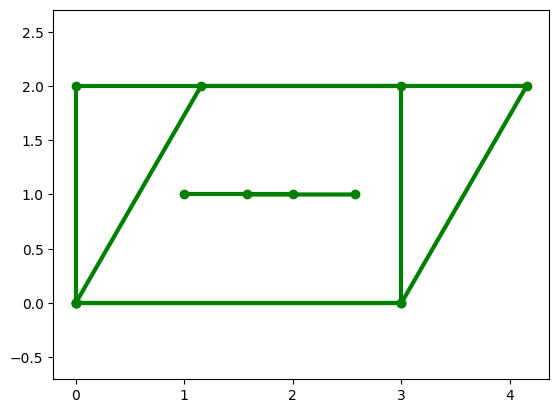

In [6]:
M = Graph(SQUARE)

M.plot()
#30 gráður
M.shear(1/np.tan(1.0472))
M.plot()
M.show()

2. Snúningsfylki

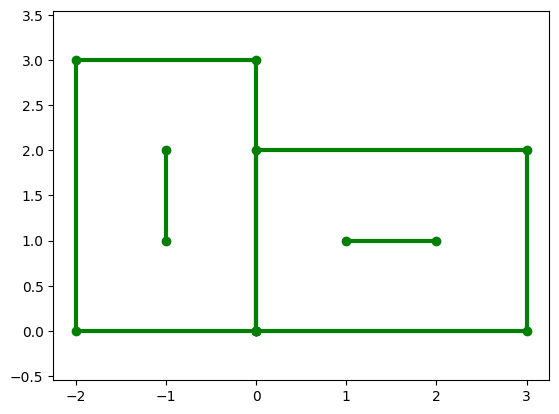

In [7]:
M = Graph(SQUARE)
M.plot()
M.rotate(np.pi / 2)
M.plot()
M.show()

3. Sammiðja rétthyrningur

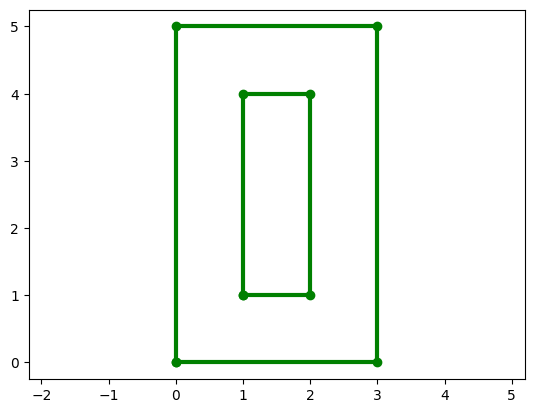

In [8]:
C = Graph(CONCENTRIC)
C.plot()
C.show()

4. Þríhyrningur með hæð

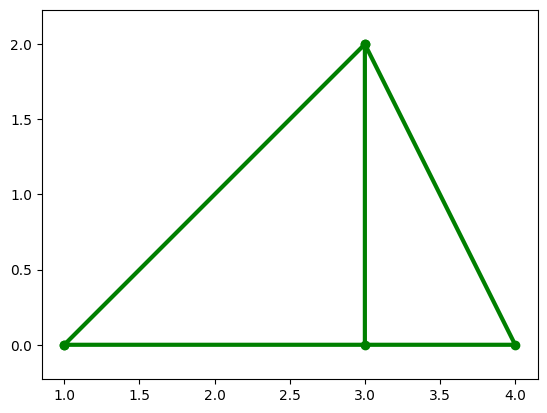

In [9]:
T = Graph(TRIANGLE)
T.plot()
T.show()

5. Hliðra-snúa-hliðra


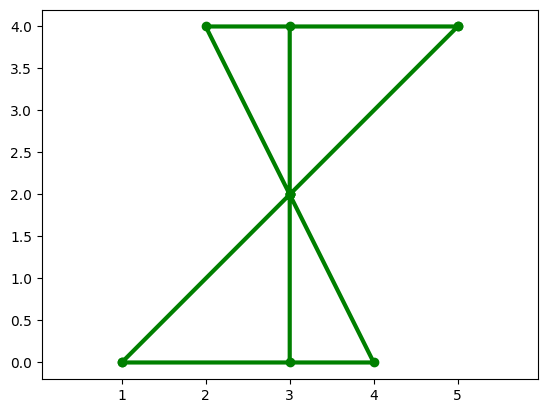

In [10]:
T = Graph(TRIANGLE)
T.plot()
T.rotate_around_point(np.array([[3],[2]]), np.pi)
T.plot()
T.show()

6. Snúa-spegla-snúa


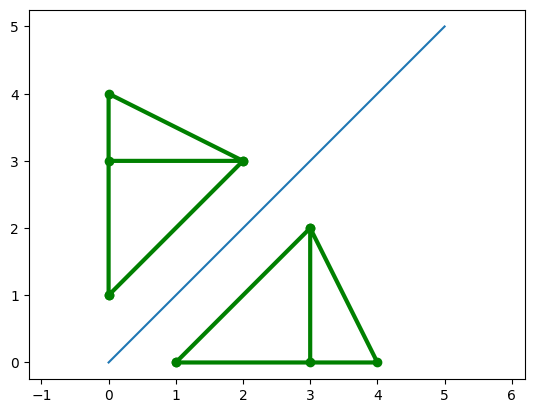

In [11]:
T = Graph(TRIANGLE)
T.plot()
T.reflect_line(1)
T.plot()
T.draw_line(1)
T.show()